# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [2]:
import pandas as pd

# Load data
df = pd.read_csv(
    './reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [3]:
data = df

# Separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [4]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

# Your Work

## **1 DATA EXPLORATION**

### 1.1 General Data Summary

In [5]:
from wordcloud import WordCloud
from textblob import TextBlob

# Display basic statistics
print("Display basic statistics: \n")
df.describe()

# Check for missing values
print("Check for missing values: \n")
df.isnull().sum()


# Analyze the distribution of the target variable
print("\nDistribution of 'Recommended IND':")
print(df['Recommended IND'].value_counts(normalize=True))


Display basic statistics: 

Check for missing values: 


Distribution of 'Recommended IND':
Recommended IND
1    0.816235
0    0.183765
Name: proportion, dtype: float64


### 1.2 Analysis of Variables (Categorical and Numerical)


Unique values in Division Name:
Division Name
General           11664
General Petite     6778
Name: count, dtype: int64

Unique values in Department Name:
Department Name
Tops        8713
Dresses     5371
Bottoms     3184
Jackets      879
Intimate     188
Trend        107
Name: count, dtype: int64

Unique values in Class Name:
Class Name
Dresses           5371
Knits             3981
Blouses           2587
Sweaters          1218
Pants             1157
Jeans              970
Fine gauge         927
Skirts             796
Jackets            598
Outerwear          281
Shorts             260
Lounge             188
Trend              107
Casual bottoms       1
Name: count, dtype: int64

Correlation between numerical features and 'Recommended IND':
Clothing ID               -0.000180
Age                        0.036656
Positive Feedback Count   -0.058392
Recommended IND            1.000000
Name: Recommended IND, dtype: float64


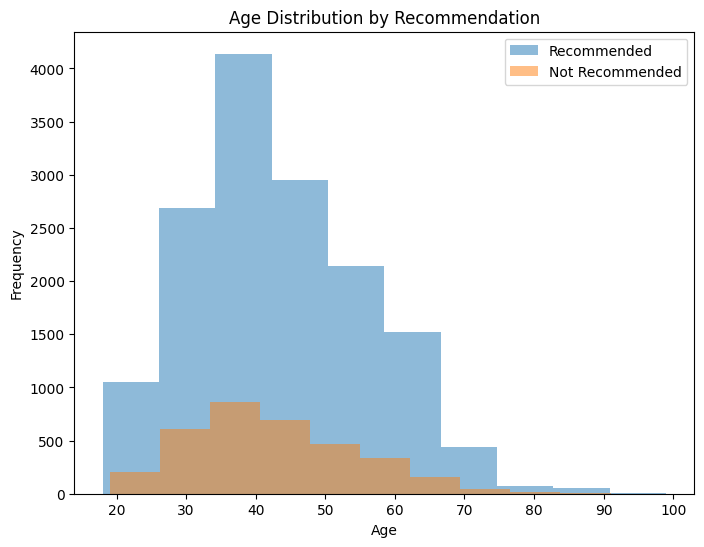

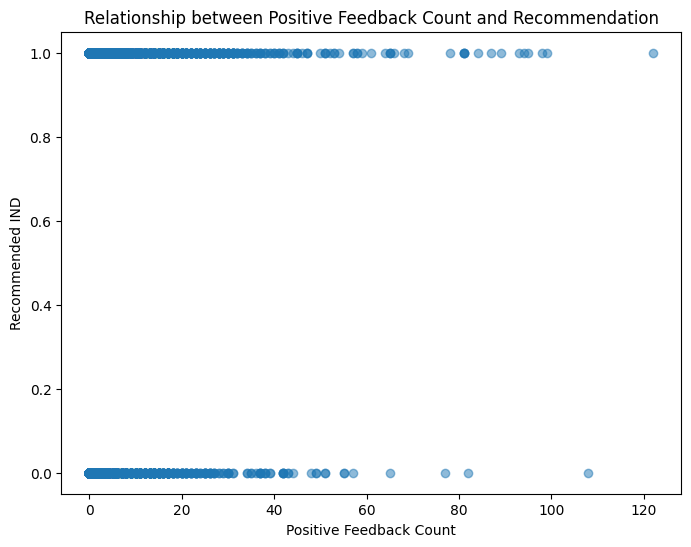

Correlation between Positive Feedback Count and Recommended IND: -0.0583924615526069


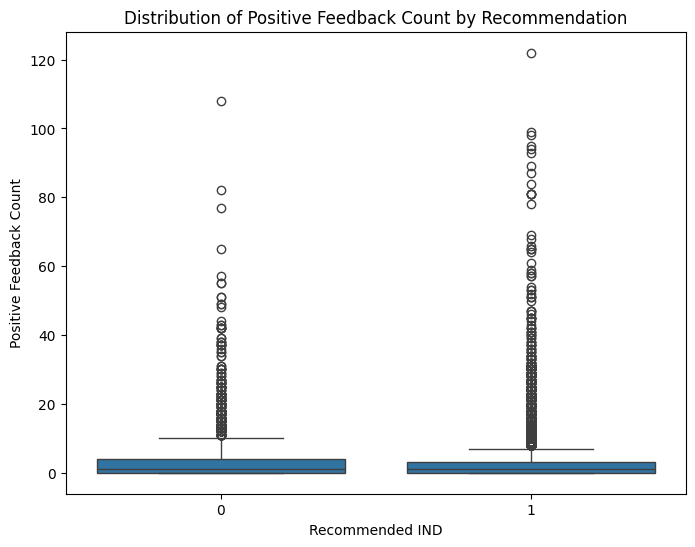

In [6]:
import matplotlib.pyplot as plt

# Explore categorical features
for col in ['Division Name', 'Department Name', 'Class Name']:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())

# Explore relationships between numerical features and the target variable
print("\nCorrelation between numerical features and 'Recommended IND':")
numerical_features = df.select_dtypes(include=['number'])
print(numerical_features.corr()['Recommended IND'])

# Example: Examine the relationship between age and recommendation
plt.figure(figsize=(8, 6))
plt.hist(df[df['Recommended IND'] == 1]['Age'], alpha=0.5, label='Recommended')
plt.hist(df[df['Recommended IND'] == 0]['Age'], alpha=0.5, label='Not Recommended')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Recommendation')
plt.legend()
plt.show()


# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Positive Feedback Count'], df['Recommended IND'], alpha=0.5)
plt.xlabel('Positive Feedback Count')
plt.ylabel('Recommended IND')
plt.title('Relationship between Positive Feedback Count and Recommendation')
plt.show()

# Correlation analysis
correlation = df['Positive Feedback Count'].corr(df['Recommended IND'])
print(f"Correlation between Positive Feedback Count and Recommended IND: {correlation}")

# Distribution comparison
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='Recommended IND', y='Positive Feedback Count', data=df)
plt.xlabel('Recommended IND')
plt.ylabel('Positive Feedback Count')
plt.title('Distribution of Positive Feedback Count by Recommendation')
plt.show()

### 1.3 Text and Sentiment Analysis

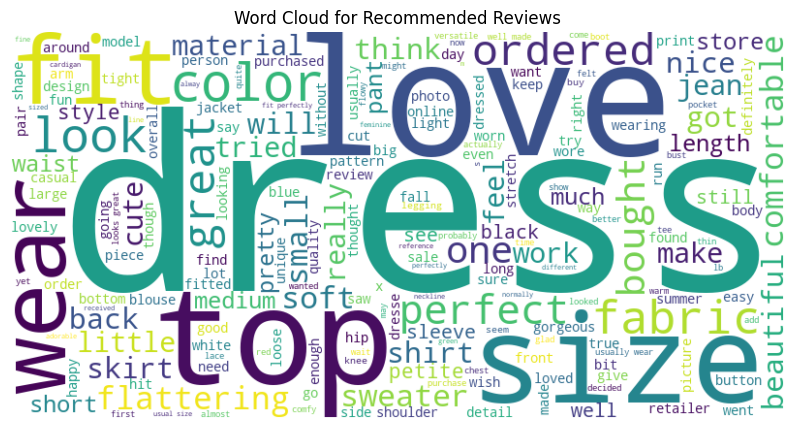

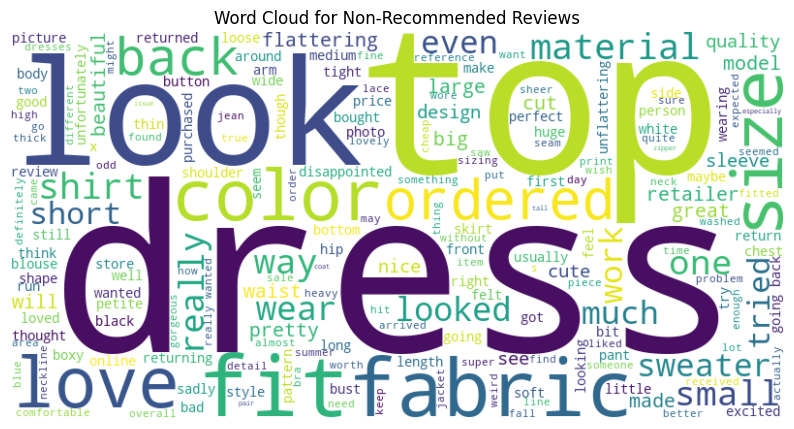

Recommended IND
0    0.13120
1    0.27222
Name: Sentiment, dtype: float64


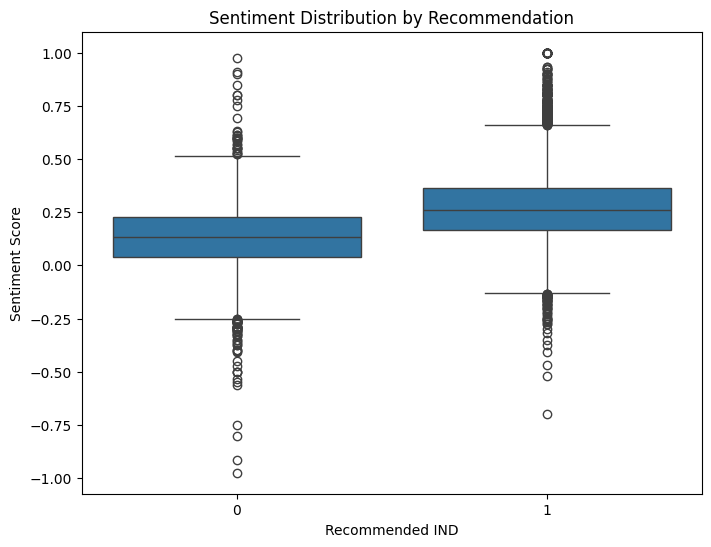

In [7]:
# Word cloud for recommended reviews
recommended_text = " ".join(df[df['Recommended IND'] == 1]['Review Text'].astype(str))
wordcloud_recommended = WordCloud(width=800, height=400, background_color='white').generate(recommended_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_recommended, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Recommended Reviews')
plt.show()

# Word cloud for non-recommended reviews
non_recommended_text = " ".join(df[df['Recommended IND'] == 0]['Review Text'].astype(str))
wordcloud_non_recommended = WordCloud(width=800, height=400, background_color='white').generate(non_recommended_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_non_recommended, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Non-Recommended Reviews')
plt.show()

# Calculate sentiment scores
df['Sentiment'] = df['Review Text'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Analyze sentiment by recommendation
sentiment_by_recommendation = df.groupby('Recommended IND')['Sentiment'].mean()
print(sentiment_by_recommendation)

# Visualize sentiment distribution
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='Recommended IND', y='Sentiment', data=df)
plt.xlabel('Recommended IND')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Distribution by Recommendation')
plt.show()

In [8]:
import spacy

# Cargar modelo de lenguaje en inglés
nlp = spacy.load("en_core_web_sm")

def extract_nlp_features(text):
    """Extrae características avanzadas de NLP: POS tagging y Named Entity Recognition (NER)."""
    doc = nlp(text)

    # Extraer etiquetas gramaticales (POS tagging)
    pos_tags = " ".join([token.pos_ for token in doc])

    # Extraer entidades nombradas (NER)
    named_entities = " ".join([ent.label_ for ent in doc.ents])

    return pos_tags, named_entities

# Aplicar la función a la columna de reseñas
df["POS_Tags"], df["Named_Entities"] = zip(*df["Review Text"].apply(lambda x: extract_nlp_features(str(x))))

# Mostrar ejemplos de los resultados
df[["Review Text", "POS_Tags", "Named_Entities"]].head()


,Review Text,POS_Tags,Named_Entities
0,I had such high hopes for this dress and reall...,PRON VERB ADJ ADJ NOUN ADP DET NOUN CCONJ ADV ...,CARDINAL CARDINAL
1,"I love, love, love this jumpsuit. it's fun, fl...",PRON VERB PUNCT NOUN PUNCT VERB DET NOUN PUNCT...,
2,This shirt is very flattering to all due to th...,DET NOUN AUX ADV ADJ ADP PRON ADJ ADP DET ADJ ...,
3,"I love tracy reese dresses, but this one is no...",PRON VERB PROPN ADJ NOUN PUNCT CCONJ DET NOUN ...,NORP QUANTITY CARDINAL
4,I aded this in my basket at hte last mintue to...,PRON VERB PRON ADP PRON NOUN ADP PROPN ADJ NOU...,ORG PERSON ORG NORP CARDINAL


### 1.4 Data Visualization


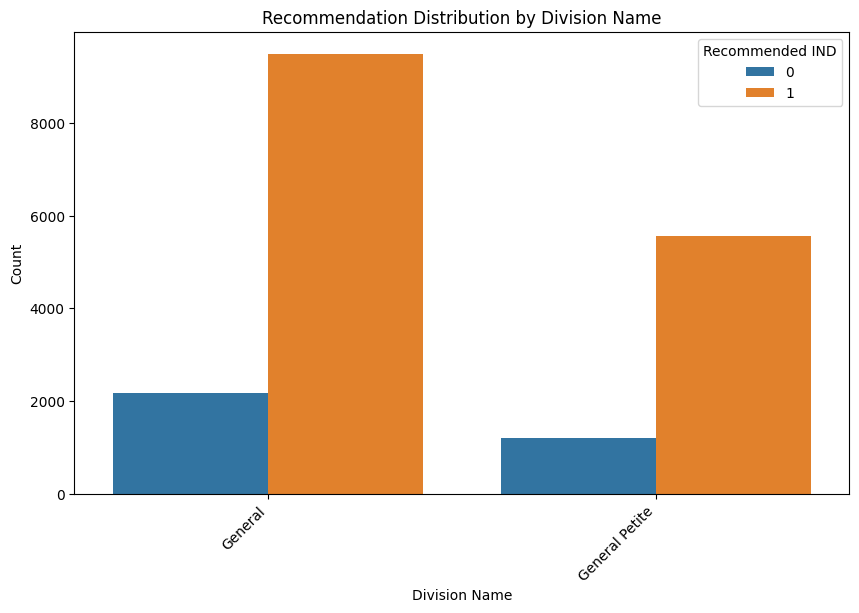

In [9]:
# Grouped bar chart for 'Division Name'
plt.figure(figsize=(10, 6))
sns.countplot(x='Division Name', hue='Recommended IND', data=df)
plt.xlabel('Division Name')
plt.ylabel('Count')
plt.title('Recommendation Distribution by Division Name')
plt.xticks(rotation=45, ha='right')
plt.show()

## **2 BUILDING PIPELINE**

### 2.1 Data preprocessing

Define the Transformer:

In [10]:
# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Models and metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Selecting columns based on their type
num_features = ['Age', 'Positive Feedback Count']
cat_features = ['Division Name', 'Department Name', 'Class Name']
text_features = ['Review Text', 'Title']

# Pipeline for numerical variables
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Pipeline for categorical variables
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline for textual variables
text_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=500))
])



In [11]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import spacy

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import spacy

class NLPFeaturesTransformer(BaseEstimator, TransformerMixin):
    """Extracts POS tagging and Named Entities from the 'Review Text' column and vectorizes them."""

    def __init__(self):
        self.nlp = spacy.load("en_core_web_sm")
        self.pos_vectorizer = CountVectorizer()  # Vectorizer for POS tagging
        self.ner_vectorizer = CountVectorizer()  # Vectorizer for Named Entities

    def fit(self, X, y=None):
        pos_tags, named_entities = zip(*[self.extract_nlp_features(text) for text in X])

        # Fit the vectorizers
        self.pos_vectorizer.fit(pos_tags)
        self.ner_vectorizer.fit(named_entities)

        return self

    def transform(self, X):
        pos_tags, named_entities = zip(*[self.extract_nlp_features(text) for text in X])

        # Convert text features into numerical vectors
        pos_encoded = self.pos_vectorizer.transform(pos_tags).toarray()
        ner_encoded = self.ner_vectorizer.transform(named_entities).toarray()

        # Create DataFrames with distinct column names
        df_pos = pd.DataFrame(pos_encoded, columns=[f"pos_{i}" for i in range(pos_encoded.shape[1])])
        df_ner = pd.DataFrame(ner_encoded, columns=[f"ner_{i}" for i in range(ner_encoded.shape[1])])

        # Concatenate both encoded features using distinct column names
        return pd.concat([df_pos, df_ner], axis=1)

    def extract_nlp_features(self, text):
        """Extracts POS tagging and Named Entities from a given text."""
        doc = self.nlp(str(text))
        pos_tags = " ".join([token.pos_ for token in doc])  # Convert POS tags into a space-separated string
        named_entities = " ".join([ent.label_ for ent in doc.ents])  # Convert NER labels into a string
        return pos_tags, named_entities


# Pipeline for NLP features
nlp_pipeline = Pipeline([
    ('nlp_features', NLPFeaturesTransformer())
])

Preprocessing:

In [12]:
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features),
    ('text_review', text_pipeline, 'Review Text'),
    ('text_title', text_pipeline, 'Title'),
    ('nlp', nlp_pipeline, 'Review Text')
])

Complete Pipeline Construction (Preprocessing + Model):

In [18]:
# Define the complete pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
])

## **3 TRAINING PIPELINE**

In [ ]:
# Train the pipeline
pipeline.fit(X_train, y_train)

Evaluando combinaciones:   0%|          | 0/15 [33:32<?, ?iter/s]


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age',
                                                   'Positive Feedback Count']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Division Name',
                                                   'Department Name',
                                                   'Class Name']),
                                                 ('text_review',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer(max_features=500,
                                                                                   stop_words='english'))]),
                                                  'Review Text'),
                                                 ('text_title',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer(max_features=500,
                                                                                   stop_words='english'))]),
                                                  'Title'),
                                                 ('nlp',
                                                  Pipeline(steps=[('nlp_features',
                                                                   NLPFeaturesTransformer())]),
                                                  'Review Text')])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [20]:
# Prediction on the test set
y_pred = pipeline.predict(X_test)

# Performance evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8661

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.34      0.48       327
           1       0.87      0.98      0.92      1518

    accuracy                           0.87      1845
   macro avg       0.83      0.66      0.70      1845
weighted avg       0.86      0.87      0.84      1845



c:\Users\ruizro\Downloads\dsnd-pipelines-project\venv\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


## **4 FINE-TUNING PIPELINE**

Hyperparameter Search with GridSearchCV:

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from tqdm import tqdm
from tqdm_joblib import tqdm_joblib
import numpy as np

# Define the search space
param_distributions = {
    'classifier__n_estimators': [10, 25],       # two options
    'classifier__max_depth': [1, 5],              # two options
    'classifier__min_samples_split': [2, 3],      # two values
    'classifier__min_samples_leaf': [1, 3]        # two values
}

# Configure the search with RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions,
    n_iter=5,             # Number of iterations (random combinations to evaluate)
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=2,
    random_state=42       # For reproducibility
)

# Total iterations: n_iter * cv
total_iterations = 5 * 3

# Run the hyperparameter search with a progress bar
with tqdm_joblib(tqdm(total=total_iterations, desc="Evaluating combinations", unit="iter")):
    random_search.fit(X_train, y_train)

# Display the best hyperparameter combination found
print("Best hyperparameters:", random_search.best_params_)

Evaluando combinaciones:   0%|          | 0/15 [00:00<?, ?iter/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Mejores hiperparámetros: {'classifier__n_estimators': 25, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 3, 'classifier__max_depth': 5}


Evaluation of the Adjusted Model:

In [22]:
# Predict with the best model
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluation of the optimized model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Optimized Accuracy: {accuracy_best:.4f}')
print('\nOptimized Classification Report:')
print(classification_report(y_test, y_pred_best))

Evaluando combinaciones:   0%|          | 0/15 [25:41<?, ?iter/s]


Optimized Accuracy: 0.7631

Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.84      0.56       327
           1       0.96      0.75      0.84      1518

    accuracy                           0.76      1845
   macro avg       0.69      0.79      0.70      1845
weighted avg       0.86      0.76      0.79      1845



c:\Users\ruizro\Downloads\dsnd-pipelines-project\venv\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


# **5 Conclusions**

* **Initial Results**: The original model achieved about 86.6% accuracy, but the recall for the minority class (customers who do not recommend the product) was only 34%, meaning it wasn’t capturing these cases well.

* **Optimization Trade-Off**: By optimizing the model with RandomizedSearchCV (using f1_macro as the scoring metric and setting class_weight='balanced' in the RandomForestClassifier), I boosted the minority class recall to 84%. However, this came at the cost of overall accuracy, which dropped to 76.3%, and a decrease in performance for the majority class.

* **Final Thoughts****: This trade-off is common with imbalanced data. For StyleSense, correctly identifying customers who do not recommend a product is crucial for gaining valuable insights, so I prefer this more balanced approach despite the lower overall accuracy.